<a href="https://colab.research.google.com/github/Sylvesterchuks/DiceyTech_Hack_the_feed/blob/main/Playhouse_Communication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hack The Feed: Insights From Social Media Data

## 👣 Process

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def transform_column_names(col):
    col = '_'.join(col.lower().split())
    return re.sub("[()-]",'', col)


def get_swap_dict(d):
    return {v: k for k, v in d.items()}


## Data Familiarization
* Begin by understanding the datasets provided. Explore the columns, types of data, and any missing values.
* Familiarize yourself with the platforms (Instagram, Facebook, Twitter, LinkedIn) from which the data originates to understand the context.


In [ ]:
twitter = pd.read_csv('/content/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')
instagram = pd.read_csv('/content/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')
linkedin = pd.read_csv('/content/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')
facebook = pd.read_csv('/content/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')

In [ ]:
selected_cols = ['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile', 'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions', 'Organic Impressions',\
                 'Reach', 'Potential Reach', 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes', 'Comments', 'Shares',\
                 'Click-Through Rate', 'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)', 'Video Views', 'Media Views', 'Organic Video Views', 'Tags']

selected_cols = [transform_column_names(col) for col in selected_cols]

In [ ]:
selected_cols

['date',
 'post_id',
 'network',
 'post_type',
 'content_type',
 'profile',
 'sent_by',
 'link',
 'post',
 'linked_content',
 'impressions',
 'organic_impressions',
 'reach',
 'potential_reach',
 'engagement_rate_per_impression',
 'engagement_rate_per_reach',
 'engagements',
 'reactions',
 'likes',
 'comments',
 'shares',
 'clickthrough_rate',
 'post_link_clicks',
 'other_post_clicks',
 'post_clicks_all',
 'video_views',
 'media_views',
 'organic_video_views',
 'tags']

In [ ]:
twitter.columns = [transform_column_names(col) for col in twitter.columns]

In [ ]:
col_dict = dict(enumerate(twitter.columns))
col_dict_swap = get_swap_dict(col_dict)

In [ ]:
twitter.head(1)

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,linked_content,...,video_removed_from_playlists,annotation_impressions,annotation_clickable_impressions,annotation_closable_impressions,annotation_closes,card_impressions,card_teaser_impressions,card_teaser_clicks,poll_votes,tags
0,7/13/2023 10:57 am,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts


In [ ]:
# list(twitter.columns)

In [ ]:
# # create a sample DataFrame
# data = {'id': [1, 2, 3],
#         'colors': ['red, green', 'blue', 'yellow, green, blue']}
# df = pd.DataFrame(data)
# df

In [ ]:
# df_expanded = df.explode('colors')
# # df_expanded = df.explode('skills')
# df_expanded = df_expanded.rename(columns={'colors': 'color'})
# print(df_expanded)

In [ ]:
# # stack the colors column
# stacked = df.set_index('id')['colors'].str.split(', ', expand=True).stack()
# # reset the index and rename the columns
# stacked = stacked.reset_index(level=1, drop=True).rename('color')
# stacked

In [ ]:
# # merge the stacked Series with the original DataFrame
# df = df.drop('colors', axis=1).merge(stacked, left_on='id', left_index=False, right_index=True)
# df

In [ ]:
# twitter_cols = twitter.isna().mean()[twitter.isna().mean() < 0.9].index
twitter = twitter.loc[:,selected_cols]

In [ ]:
# goodtext = encoded.decode('utf-8') # 'America’s'
#  int: impressions; organic impressions; potential_reach, engagements, reactions, likes, comments, shares, post_link_clicks, other_post_clicks, post_clicks_all,
# post_media_clicks, post_hashtag_clicks, post_detail_expand_clicks, profile_clicks, other_engagements, app_engagements, app_install_attempts,
# app_opens, follows_from_post, unfollows_from_post, video_views, media_views
# float: engagement_rate_per_impression, click_through_rate,

In [ ]:
def convert_numbers_to_int(x):
    if type(x)==int:
        return x
    elif type(x)==float:
        return np.int32(x)
    # return np.int32(re.sub('\W', '',x))
    return np.int32(x.replace(',', ''))

def remove_special_char(x):
    if pd.isna(x):
        return x
    return re.sub(r"[%,:;]?", '', str(x))
    # print(x.replace(',', ''))
    # return x.replace(',', '')

def calculate_measure_of_center(df,x,agg='mean'):
    if agg=='mode':
        return df[x].mode()[0]
    elif agg=='median':
        return df[x].median()
    elif agg=='mean':
        return df[x].mean()
    else:
        return agg

In [ ]:
twitter.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            8529 non-null   object 
 1   post_id                         8529 non-null   int64  
 2   network                         8529 non-null   object 
 3   post_type                       8529 non-null   object 
 4   content_type                    8529 non-null   object 
 5   profile                         8529 non-null   object 
 6   sent_by                         8529 non-null   object 
 7   link                            8481 non-null   object 
 8   post                            8529 non-null   object 
 9   linked_content                  4978 non-null   object 
 10  impressions                     7842 non-null   object 
 11  organic_impressions             7842 non-null   object 
 12  reach                           0 

In [ ]:
int_type_cols = ['impressions', 'organic_impressions', 'reach', 'potential_reach', 'engagement_rate_per_impression', 'engagement_rate_per_reach','engagements', 'reactions', 'likes', \
                 'comments', 'shares', 'post_link_clicks', 'other_post_clicks', 'clickthrough_rate', 'post_clicks_all', 'video_views', 'media_views', 'organic_video_views']

for col in int_type_cols:
    twitter[col] = twitter[col].apply(remove_special_char).astype(np.float32)

In [ ]:
twitter[int_type_cols]

,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments,shares,post_link_clicks,other_post_clicks,clickthrough_rate,post_clicks_all,video_views,media_views,organic_video_views
0,445.0,445.0,NaN,345718.0,3.60,NaN,16.0,4.0,4.0,2.0,1.0,NaN,9.0,NaN,9.0,NaN,1.0,NaN
1,2961.0,2961.0,NaN,347102.0,1.76,NaN,52.0,11.0,11.0,20.0,3.0,NaN,18.0,NaN,18.0,NaN,NaN,NaN
2,850.0,850.0,NaN,347594.0,4.24,NaN,36.0,4.0,4.0,1.0,3.0,7.0,21.0,0.82,28.0,NaN,11.0,NaN
3,1499.0,1499.0,NaN,349169.0,3.40,NaN,51.0,13.0,13.0,3.0,5.0,NaN,30.0,NaN,30.0,NaN,24.0,NaN
4,1184.0,1184.0,NaN,345653.0,1.52,NaN,18.0,7.0,7.0,3.0,1.0,NaN,7.0,NaN,7.0,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,NaN,NaN,NaN,166372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8525,NaN,NaN,NaN,166372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8526,NaN,NaN,NaN,166372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
twitter['linked_content'] = twitter['linked_content'].apply(lambda x: False if pd.isna(x) else True)
twitter['has_tag'] = twitter['tags'].apply(lambda x: False if pd.isna(x) else True)

In [ ]:
twitter.describe()

,post_id,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments,shares,clickthrough_rate,post_link_clicks,other_post_clicks,post_clicks_all,video_views,media_views,organic_video_views
count,8.529000e+03,7842.000000,7842.000000,0.0,8.449000e+03,7841.000000,0.0,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,3613.000000,3613.000000,7842.000000,7842.000000,855.000000,6698.000000,0.0
mean,1.209537e+18,3188.676270,3188.676270,NaN,2.806459e+05,2.910116,NaN,110.073708,20.210150,20.210150,6.244963,8.317393,0.267924,7.002768,69.002167,72.228516,176.845612,63.247387,NaN
std,2.954973e+17,3337.303223,3337.303223,NaN,1.053295e+05,2.870294,NaN,305.482361,171.197037,171.197037,17.722315,21.606554,0.525716,23.923304,198.227783,201.478516,226.128006,138.636475,NaN
min,3.030516e+17,0.000000,0.000000,NaN,0.000000e+00,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,9.706765e+17,1285.000000,1285.000000,NaN,2.226310e+05,1.680000,NaN,29.000000,5.000000,5.000000,0.000000,2.000000,0.040000,1.000000,15.000000,16.000000,83.000000,10.000000,NaN
50%,1.232560e+18,2440.500000,2440.500000,NaN,3.030520e+05,2.390000,NaN,57.000000,10.000000,10.000000,2.000000,4.000000,0.100000,2.000000,31.000000,34.000000,122.000000,25.000000,NaN
75%,1.497255e+18,3801.000000,3801.000000,NaN,3.210280e+05,3.400000,NaN,109.000000,17.000000,17.000000,6.000000,10.000000,0.300000,6.000000,67.000000,71.000000,199.000000,66.000000,NaN
max,1.679430e+18,77765.000000,77765.000000,NaN,2.194275e+06,112.680000,NaN,14972.000000,13528.000000,13528.000000,623.000000,1135.000000,12.670000,699.000000,9083.000000,9124.000000,3769.000000,3769.000000,NaN


In [ ]:
twitter.isna().mean().sort_values()

date                              0.000000
linked_content                    0.000000
post                              0.000000
sent_by                           0.000000
profile                           0.000000
has_tag                           0.000000
post_type                         0.000000
network                           0.000000
post_id                           0.000000
content_type                      0.000000
link                              0.005628
potential_reach                   0.009380
post_clicks_all                   0.080549
other_post_clicks                 0.080549
shares                            0.080549
comments                          0.080549
likes                             0.080549
reactions                         0.080549
organic_impressions               0.080549
impressions                       0.080549
engagements                       0.080549
engagement_rate_per_impression    0.080666
media_views                       0.214679
clickthroug

In [ ]:
missing_not_at_random = {'post_clicks_all': 'mean',
                         'other_post_clicks': 'mean',
                         'shares': 'mean',
                         'comments': 'mean',
                         'likes': 'mean',
                         'reactions': 'mean',
                         'organic_impressions': 'mean',
                         'impressions': 'mean',
                         'engagements': 'mean',
                        }

In [ ]:
twitter_missing_cols = {'potential_reach':'mean',
                        # 'engagement_rate_per_impression':'',
                        # 'engagement_rate_per_reach':'',
                        'media_views':-1,
                        'clickthrough_rate':0,
                        # 'post_link_clicks':'',
                        'tags':'',
                        'video_views':-1
                        }

In [ ]:
twitter_missing_cols.update(missing_not_at_random)

In [ ]:
for k,v in twitter_missing_cols.items():
    twitter[k].fillna(calculate_measure_of_center(twitter,k,v), inplace=True)

In [ ]:
# twitter['tags'].fillna(calculate_measure_of_center(twitter,'tags','mode'))

In [ ]:
# 500 engagements / 5,000 followers = 0.1 x 100 = 10%
twitter['engagement_rate_per_reach'] = (twitter['engagements']/twitter['potential_reach'])*100
twitter['engagement_rate_per_impression'] = (twitter['engagements']/twitter['impressions'])*100
twitter['post_link_clicks'] = twitter['post_clicks_all'] - twitter['other_post_clicks']

In [ ]:
twitter.isna().mean().sort_values()

date                              0.000000
media_views                       0.000000
video_views                       0.000000
post_clicks_all                   0.000000
other_post_clicks                 0.000000
post_link_clicks                  0.000000
clickthrough_rate                 0.000000
shares                            0.000000
comments                          0.000000
likes                             0.000000
reactions                         0.000000
engagements                       0.000000
tags                              0.000000
engagement_rate_per_impression    0.000000
organic_impressions               0.000000
impressions                       0.000000
linked_content                    0.000000
post                              0.000000
sent_by                           0.000000
profile                           0.000000
content_type                      0.000000
post_type                         0.000000
network                           0.000000
post_id    

In [ ]:
twitter['sent_by'] = twitter['sent_by'].apply(lambda x: x if x!=' ' else np.nan)
twitter['sent_by'] = twitter['sent_by'].fillna(method='ffill')

In [ ]:
twitter.describe()

,post_id,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments,shares,clickthrough_rate,post_link_clicks,other_post_clicks,post_clicks_all,video_views,media_views,organic_video_views
count,8.529000e+03,8529.000000,8529.000000,0.0,8.529000e+03,8529.000000,8527.000000,8529.000000,8529.000000,8529.000000,8529.000000,8529.000000,8529.000000,8529.000000,8529.000000,8529.000000,8529.000000,8529.000000,0.0
mean,1.209537e+18,3188.676514,3188.676514,NaN,2.806458e+05,inf,inf,110.073708,20.210150,20.210150,6.244963,8.317393,0.113496,3.226345,69.002167,72.228508,16.828350,49.454800,NaN
std,2.954973e+17,3200.057617,3200.057617,NaN,1.048343e+05,NaN,NaN,292.919495,164.156616,164.156616,16.993488,20.717991,0.366862,15.925127,190.075729,193.192780,89.295921,125.655945,NaN
min,3.030516e+17,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,NaN
25%,9.706765e+17,1350.000000,1350.000000,NaN,2.230770e+05,1.734104,0.011172,31.000000,5.000000,5.000000,1.000000,2.000000,0.000000,0.000000,16.000000,17.000000,-1.000000,3.000000,NaN
50%,1.232560e+18,2642.000000,2642.000000,NaN,3.025360e+05,2.529886,0.023265,63.000000,11.000000,11.000000,3.000000,5.000000,0.000000,0.000000,36.000000,38.000000,-1.000000,16.000000,NaN
75%,1.497255e+18,3661.000000,3661.000000,NaN,3.206740e+05,3.452019,0.045264,110.073708,20.210150,20.210150,6.244963,9.000000,0.070000,3.000000,69.002167,72.228516,-1.000000,49.000000,NaN
max,1.679430e+18,77765.000000,77765.000000,NaN,2.194275e+06,inf,inf,14972.000000,13528.000000,13528.000000,623.000000,1135.000000,12.670000,699.000000,9083.000000,9124.000000,3769.000000,3769.000000,NaN


In [ ]:
instagram.columns = [transform_column_names(col) for col in instagram.columns]

In [ ]:
instagram.isna().mean().sort_values(ascending=False)[100:130]

app_install_attempts              1.0000
app_engagements                   1.0000
answers                           1.0000
other_engagements                 1.0000
post_video_play_clicks            1.0000
post_photo_view_clicks            1.0000
profile_clicks                    1.0000
post_detail_expand_clicks         1.0000
post_hashtag_clicks               1.0000
post_media_clicks                 1.0000
post_clicks_all                   1.0000
other_post_clicks                 1.0000
post_link_clicks                  1.0000
clickthrough_rate                 1.0000
youtube_premium_views             1.0000
shares                            1.0000
estimated_minutes_watched         1.0000
angry_reactions                   1.0000
sad_reactions                     1.0000
wow_reactions                     1.0000
haha_reactions                    1.0000
love_reactions                    1.0000
dislikes                          1.0000
video_ad_break_ad_impressions     1.0000
video_views     

In [ ]:
# instagram_cols = instagram.isna().mean()[instagram.isna().mean() < 0.9].index
# instagram_cols

In [ ]:
instagram = instagram.loc[:,selected_cols]

In [ ]:
instagram.iloc[:,9:20].head()

,linked_content,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments
0,NaN,"39,681","39,681","32,418",NaN,4.89%,5.99%,"1,942","1,261","1,261",56
1,NaN,"29,186","29,186","25,055",NaN,6.04%,7.04%,"1,763",709,709,"1,033"
2,NaN,"21,175","21,175","19,237",NaN,3.48%,3.83%,736,702,702,23
3,NaN,"23,425","23,425","18,993",NaN,4.48%,5.53%,"1,050",677,677,36
4,NaN,"21,033","21,033","18,335",NaN,6.58%,7.54%,"1,383",757,757,606


In [ ]:
for col in int_type_cols:
    instagram[col] = instagram[col].apply(remove_special_char).astype(np.float32)

In [ ]:
instagram['linked_content'] = instagram['linked_content'].apply(lambda x: False if pd.isna(x) else True)
instagram['has_tag'] = instagram['tags'].apply(lambda x: False if pd.isna(x) else True)

In [ ]:
instagram.isna().mean().sort_values()

date                              0.0000
comments                          0.0000
likes                             0.0000
reactions                         0.0000
engagements                       0.0000
linked_content                    0.0000
link                              0.0000
has_tag                           0.0000
network                           0.0000
profile                           0.0000
post_id                           0.0000
sent_by                           0.0000
post_type                         0.0000
content_type                      0.0000
post                              0.0011
reach                             0.1484
organic_impressions               0.1484
impressions                       0.1484
engagement_rate_per_impression    0.1768
engagement_rate_per_reach         0.2747
tags                              0.8454
video_views                       0.8645
organic_video_views               0.8645
potential_reach                   1.0000
shares          

In [ ]:
instagram_missing_cols = {'shares':0,
                          'impressions':'mean',
                        'reach':'mean',
                        'post':'',
                        'media_views':-1,
                        'clickthrough_rate':0,
                        # 'post_link_clicks':0,
                        'post_clicks_all':0,
                        'other_post_clicks':0,
                        'tags':'',
                        'video_views':-1
                        }

# instagram_missing_cols.update(missing_not_at_random)

for k,v in instagram_missing_cols.items():
    instagram[k].fillna(calculate_measure_of_center(instagram,k,v), inplace=True)

In [ ]:
# 500 engagements / 5,000 followers = 0.1 x 100 = 10%
# instagram['potential_reach']=instagram['reach']
instagram['potential_reach'] = instagram['engagements']/instagram['engagement_rate_per_reach']
instagram['engagement_rate_per_reach'] = (instagram['engagements']/instagram['potential_reach'])*100
instagram['engagement_rate_per_impression'] = (instagram['engagements']/instagram['impressions'])*100
instagram['post_link_clicks'] = instagram['post_clicks_all'] - instagram['other_post_clicks']

In [ ]:
instagram.isna().mean().sort_values()

date                              0.0000
media_views                       0.0000
video_views                       0.0000
post_clicks_all                   0.0000
other_post_clicks                 0.0000
post_link_clicks                  0.0000
clickthrough_rate                 0.0000
shares                            0.0000
comments                          0.0000
likes                             0.0000
reactions                         0.0000
engagements                       0.0000
tags                              0.0000
has_tag                           0.0000
reach                             0.0000
impressions                       0.0000
linked_content                    0.0000
post                              0.0000
link                              0.0000
sent_by                           0.0000
profile                           0.0000
content_type                      0.0000
post_type                         0.0000
network                           0.0000
post_id         

In [ ]:
instagram['sent_by'] = instagram['sent_by'].apply(lambda x: x if x!=' ' else np.nan)
instagram['sent_by'] = instagram['sent_by'].fillna(method='ffill')

In [ ]:
instagram.describe()

,post_id,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments,shares,clickthrough_rate,post_link_clicks,other_post_clicks,post_clicks_all,video_views,media_views,organic_video_views
count,1.000000e+04,10000.000000,8516.000000,10000.000000,7247.000000,9995.000000,7.247000e+03,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.0,1355.000000
mean,1.793491e+16,2273.855225,2273.855225,1503.111816,17.662985,inf,1.442895e+05,100.463097,90.886803,90.886803,7.831000,0.0,0.0,0.0,0.0,0.0,80.378098,-1.0,599.576355
std,9.977627e+13,1608.139404,1742.647949,1633.319580,17.932438,NaN,3.684696e+05,791.492249,790.223511,790.223511,23.762632,0.0,0.0,0.0,0.0,0.0,568.433838,0.0,1440.174072
min,1.784149e+16,0.000000,0.000000,0.000000,0.010000,0.000000,4.800000e+01,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.0,0.000000
25%,1.786071e+16,1457.000000,1359.750000,3.000000,7.142857,2.112676,2.480000e+02,34.000000,29.000000,29.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.0,0.000000
50%,1.790449e+16,2241.000000,1997.500000,1503.111816,15.384615,2.858581,3.260000e+02,56.000000,50.000000,50.000000,3.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.0,328.000000
75%,1.796810e+16,2615.250000,2780.250000,2077.000000,24.082020,3.888145,5.770000e+02,88.000000,79.000000,79.000000,8.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.0,611.500000
max,1.838963e+16,39681.000000,39681.000000,32418.000000,324.207031,inf,6.560000e+06,33395.000000,33394.000000,33394.000000,1033.000000,0.0,0.0,0.0,0.0,0.0,33179.000000,-1.0,33179.000000


In [ ]:
linkedin.columns = [transform_column_names(col) for col in linkedin.columns]

In [ ]:
linkedin.isna().mean().sort_values(ascending=False)[100:130]

app_engagements                      1.000000
answers                              1.000000
other_engagements                    1.000000
post_video_play_clicks               1.000000
post_photo_view_clicks               1.000000
profile_clicks                       1.000000
post_detail_expand_clicks            1.000000
post_hashtag_clicks                  1.000000
post_media_clicks                    1.000000
video_ad_break_ad_impressions        1.000000
love_reactions                       1.000000
other_post_clicks                    1.000000
estimated_minutes_watched            1.000000
estimated_premium_minutes_watched    1.000000
saves                                1.000000
story_taps_back                      1.000000
youtube_premium_views                1.000000
story_taps_forward                   1.000000
angry_reactions                      1.000000
sad_reactions                        1.000000
wow_reactions                        1.000000
haha_reactions                    

In [ ]:
# linkedin_cols = linkedin.isna().mean()[linkedin.isna().mean() < 0.9].index

In [ ]:
# cols = list(set(linkedin_cols.append(instagram_cols)))
# cols.sort(key=lambda x:col_dict_swap[x])
# cols

In [ ]:
linkedin = linkedin.loc[:,selected_cols]

In [ ]:
for col in int_type_cols:
    linkedin[col] = linkedin[col].apply(remove_special_char).astype(np.float32)

In [ ]:
# linkedin['potential_reach'] = linkedin['engagements']/linkedin['engagement_rate_per_reach']
linkedin['linked_content'] = linkedin['linked_content'].apply(lambda x: False if pd.isna(x) else True)
linkedin['has_tag'] = linkedin['tags'].apply(lambda x: False if pd.isna(x) else True)

In [ ]:
linkedin.isna().mean().sort_values()

date                              0.000000
linked_content                    0.000000
sent_by                           0.000000
profile                           0.000000
has_tag                           0.000000
post_type                         0.000000
network                           0.000000
post_id                           0.000000
content_type                      0.000000
link                              0.000515
post                              0.003995
post_clicks_all                   0.184021
post_link_clicks                  0.184021
clickthrough_rate                 0.184021
shares                            0.184021
comments                          0.184021
likes                             0.184021
reactions                         0.184021
organic_impressions               0.184021
impressions                       0.184021
engagements                       0.184021
engagement_rate_per_impression    0.184021
tags                              0.788660
video_views

In [ ]:
missing_not_at_random

{'post_clicks_all': 'mean',
 'other_post_clicks': 'mean',
 'shares': 'mean',
 'comments': 'mean',
 'likes': 'mean',
 'reactions': 'mean',
 'organic_impressions': 'mean',
 'impressions': 'mean',
 'engagements': 'mean'}

In [ ]:
linkedin_missing_cols = {'shares':0,
                          'post_link_clicks':'mean',
                        # 'reach':'mean',
                        'post':'',
                        'media_views':-1,
                        'clickthrough_rate':0,
                        'organic_video_views':-1,
                        'tags':'',
                        'video_views':-1
                        }

linkedin_missing_cols.update(missing_not_at_random)

for k,v in linkedin_missing_cols.items():
    linkedin[k].fillna(calculate_measure_of_center(linkedin,k,v), inplace=True)

In [ ]:
# linkedin['potential_reach'] = linkedin['engagements']/linkedin['engagement_rate_per_reach']
# linkedin['engagement_rate_per_reach'] = (linkedin['engagements']/linkedin['potential_reach'])*100
linkedin['engagement_rate_per_impression'] = (linkedin['engagements']/linkedin['impressions'])*100
linkedin['other_post_clicks'] = linkedin['post_clicks_all'] - linkedin['post_link_clicks']

In [ ]:
linkedin['sent_by'] = linkedin['sent_by'].apply(lambda x: x if x!=' ' else np.nan)
linkedin['sent_by'] = linkedin['sent_by'].fillna(method='ffill')

In [ ]:
linkedin.isna().mean().sort_values()

date                              0.000000
organic_video_views               0.000000
media_views                       0.000000
video_views                       0.000000
post_clicks_all                   0.000000
other_post_clicks                 0.000000
post_link_clicks                  0.000000
clickthrough_rate                 0.000000
shares                            0.000000
comments                          0.000000
likes                             0.000000
reactions                         0.000000
engagements                       0.000000
tags                              0.000000
engagement_rate_per_impression    0.000000
organic_impressions               0.000000
impressions                       0.000000
linked_content                    0.000000
post                              0.000000
sent_by                           0.000000
profile                           0.000000
content_type                      0.000000
post_type                         0.000000
network    

In [ ]:
linkedin.describe()

,post_id,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments,shares,clickthrough_rate,post_link_clicks,other_post_clicks,post_clicks_all,video_views,media_views,organic_video_views
count,7.760000e+03,7760.000000,7760.000000,0.0,0.0,7760.000000,0.0,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.0,7760.000000,7760.000000,7760.0,7760.000000
mean,6.689876e+18,1083.303711,1083.303711,NaN,NaN,6.710169,NaN,50.445515,15.752684,15.752684,1.152874,1.407454,1.310413,32.132504,0.0,32.132504,50.749485,-1.0,50.743427
std,2.613510e+17,1279.237915,1279.237915,NaN,NaN,35.517799,NaN,182.131012,27.374996,27.374996,7.015201,1.997574,2.486750,164.841476,0.0,164.841476,774.031433,0.0,774.031921
min,5.869022e+18,1.000000,1.000000,NaN,NaN,-1.196670,NaN,-23.000000,-103.000000,-103.000000,-16.000000,-6.000000,0.000000,0.000000,0.0,0.000000,-1.000000,-1.0,-1.000000
25%,6.485442e+18,534.750000,534.750000,NaN,NaN,2.070343,NaN,13.000000,6.000000,6.000000,0.000000,0.000000,0.240000,4.000000,0.0,4.000000,-1.000000,-1.0,-1.000000
50%,6.718173e+18,944.000000,944.000000,NaN,NaN,3.045202,NaN,26.000000,13.000000,13.000000,0.000000,1.000000,0.830000,11.000000,0.0,11.000000,-1.000000,-1.0,-1.000000
75%,6.907367e+18,1088.250000,1088.250000,NaN,NaN,4.656636,NaN,50.445515,15.752685,15.752685,1.152874,2.000000,1.480000,32.132500,0.0,32.132500,-1.000000,-1.0,-1.000000
max,7.085212e+18,37889.000000,37889.000000,NaN,NaN,900.000000,NaN,6235.000000,957.000000,957.000000,284.000000,26.000000,58.330002,6089.000000,0.0,6089.000000,58092.000000,-1.0,58092.000000


In [ ]:
facebook.columns = [transform_column_names(col) for col in facebook.columns]

In [ ]:
facebook.isna().mean().sort_values(ascending=False)[:50]

post_media_clicks                            1.000000
unspecified_video_views                      1.000000
business_account_video_views                 1.000000
potential_reach                              1.000000
hashtag_video_views                          1.000000
for_you_video_views                          1.000000
follow_video_views                           1.000000
full_video_view_rate                         1.000000
saves                                        1.000000
post_hashtag_clicks                          1.000000
post_detail_expand_clicks                    1.000000
profile_clicks                               1.000000
media_views                                  1.000000
other_engagements                            1.000000
app_engagements                              1.000000
app_install_attempts                         1.000000
app_opens                                    1.000000
follows_from_post                            1.000000
unfollows_from_post         

In [ ]:
# facebook_cols = facebook.isna().mean()[facebook.isna().mean() < 0.91].index
# facebook_cols

In [ ]:
facebook = facebook.loc[:, selected_cols]

In [ ]:
for col in int_type_cols:
    facebook[col] = facebook[col].apply(remove_special_char).astype(np.float32)

In [ ]:
# facebook['potential_reach'] = facebook['engagements']/facebook['engagement_rate_per_reach']
facebook['linked_content'] = facebook['linked_content'].apply(lambda x: False if pd.isna(x) else True)
facebook['has_tag'] = facebook['tags'].apply(lambda x: False if pd.isna(x) else True)

In [ ]:
missing_not_at_random

{'post_clicks_all': 'mean',
 'other_post_clicks': 'mean',
 'shares': 'mean',
 'comments': 'mean',
 'likes': 'mean',
 'reactions': 'mean',
 'organic_impressions': 'mean',
 'impressions': 'mean',
 'engagements': 'mean'}

In [ ]:
facebook_missing_cols = {#'shares':0,
                        #   'post_link_clicks':'mean',
                        'reach':'mean',
                        'post':'',
                        'media_views':-1,
                        'clickthrough_rate':0,
                        'organic_video_views':-1,
                        'tags':'',
                        'video_views':-1
                        }

facebook_missing_cols.update(missing_not_at_random)

for k,v in facebook_missing_cols.items():
    facebook[k].fillna(calculate_measure_of_center(facebook,k,v), inplace=True)

In [ ]:
facebook.isna().mean().sort_values()

date                              0.000000
organic_video_views               0.000000
media_views                       0.000000
video_views                       0.000000
post_clicks_all                   0.000000
other_post_clicks                 0.000000
clickthrough_rate                 0.000000
shares                            0.000000
comments                          0.000000
likes                             0.000000
reactions                         0.000000
engagements                       0.000000
tags                              0.000000
has_tag                           0.000000
reach                             0.000000
organic_impressions               0.000000
impressions                       0.000000
linked_content                    0.000000
post                              0.000000
link                              0.000000
sent_by                           0.000000
profile                           0.000000
content_type                      0.000000
post_type  

In [ ]:
facebook['potential_reach'] = facebook['engagements']/(facebook['engagement_rate_per_reach']/100)
facebook['engagement_rate_per_reach'] = (facebook['engagements']/facebook['potential_reach'])*100
facebook['engagement_rate_per_impression'] = (facebook['engagements']/facebook['impressions'])*100
facebook['post_link_clicks'] = facebook['post_clicks_all'] - facebook['other_post_clicks']

In [ ]:
facebook['sent_by'] = facebook['sent_by'].apply(lambda x: x if x!=' ' else np.nan)
facebook['sent_by'] = facebook['sent_by'].fillna(method='ffill')

In [ ]:
facebook.isna().mean().sort_values()

date                              0.000000
organic_video_views               0.000000
media_views                       0.000000
video_views                       0.000000
post_clicks_all                   0.000000
other_post_clicks                 0.000000
post_link_clicks                  0.000000
clickthrough_rate                 0.000000
shares                            0.000000
comments                          0.000000
likes                             0.000000
reactions                         0.000000
engagements                       0.000000
tags                              0.000000
has_tag                           0.000000
reach                             0.000000
organic_impressions               0.000000
impressions                       0.000000
linked_content                    0.000000
post                              0.000000
link                              0.000000
sent_by                           0.000000
profile                           0.000000
content_typ

In [ ]:
facebook.describe()

,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments,shares,clickthrough_rate,post_link_clicks,other_post_clicks,post_clicks_all,video_views,media_views,organic_video_views
count,9803.000000,9803.000000,9803.00000,7709.000000,9772.000000,7709.000000,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000,9803.000000,9803.0,9803.000000
mean,5857.725098,5794.522949,5210.64209,6011.014160,inf,5.652775,231.683228,91.886986,89.108513,20.538738,8.381311,0.160721,2.095919,108.780273,110.876198,21.202898,-1.0,21.283178
std,6948.523926,6827.245117,6027.02832,6439.294434,NaN,54.544132,1055.213013,966.594177,962.580688,56.276234,18.206545,6.425901,9.719643,257.111694,257.864838,133.765549,0.0,133.809616
min,0.000000,0.000000,0.00000,2.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-51.000000,0.000000,-1.000000,-1.0,-1.000000
25%,2296.500000,2286.500000,2135.00000,2740.740723,2.025895,2.000000,60.000000,24.000000,23.000000,3.000000,1.000000,0.000000,0.000000,20.000000,21.000000,-1.000000,-1.0,-1.000000
50%,4555.000000,4530.000000,4162.00000,4285.714355,3.055239,2.830000,122.000000,43.000000,42.000000,9.000000,3.000000,0.000000,0.000000,55.000000,57.000000,-1.000000,-1.0,-1.000000
75%,6885.500000,6813.500000,6111.50000,7183.098145,4.455768,4.230000,231.683228,91.886993,89.108513,20.538738,8.381311,0.000000,1.000000,108.780273,110.876198,-1.000000,-1.0,-1.000000
max,207378.000000,207378.000000,207378.00000,208979.593750,inf,2757.000000,72474.000000,70484.000000,70244.000000,1552.000000,588.000000,500.000000,350.000000,5989.000000,5989.000000,6282.000000,-1.0,6282.000000


## Data Cleaning and Pre-processing:
* Handle missing values, either by imputing or removing them based on their relevance.
* Convert data types if necessary (e.g., dates, categorical data).
Remove any duplicate entries.

In [ ]:
media_post = pd.concat([twitter,instagram,linkedin,facebook])
media_post.head(2)

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,linked_content,...,shares,clickthrough_rate,post_link_clicks,other_post_clicks,post_clicks_all,video_views,media_views,organic_video_views,tags,has_tag
0,7/13/2023 10:57 am,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,True,...,1.0,0.0,0.0,9.0,9.0,-1.0,1.0,NaN,CIB Posts,True
1,7/12/2023 8:03 pm,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",False,...,3.0,0.0,0.0,18.0,18.0,-1.0,-1.0,NaN,,False


In [ ]:
media_post.describe()

,impressions,organic_impressions,reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,comments,shares,clickthrough_rate,post_link_clicks,other_post_clicks,post_clicks_all,video_views,media_views,organic_video_views
count,36092.000000,34608.000000,19803.000000,2.348500e+04,3.605600e+04,2.348300e+04,36092.000000,36092.000000,36092.000000,36092.000000,36092.000000,36092.000000,36092.000000,36092.000000,36092.000000,36092.000000,36092.000000,18918.000000
mean,3207.483643,3229.615234,3338.435791,1.039002e+05,inf,inf,127.621010,58.302380,57.547710,9.471930,4.544577,0.352221,8.240386,45.852058,54.092445,42.917488,10.923113,74.787712
std,4440.780273,4467.811035,4771.192383,1.477358e+05,NaN,NaN,712.653687,659.253174,657.618958,33.863586,14.405203,3.582047,78.006653,169.492416,185.978867,475.138489,64.732811,651.857300
min,0.000000,0.000000,0.000000,0.000000e+00,-1.196670e+00,0.000000e+00,-23.000000,-103.000000,-103.000000,-16.000000,-6.000000,0.000000,0.000000,-51.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,1083.303711,1083.303711,951.000000,2.666667e+01,1.983299e+00,3.700667e-02,29.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,2196.000000,2072.000000,2079.000000,4.889706e+03,2.857143e+00,2.560000e+00,56.500000,23.000000,22.000000,2.000000,1.000000,0.000000,0.000000,0.000000,14.000000,-1.000000,-1.000000,-1.000000
75%,3693.250000,3797.000000,4434.000000,2.344110e+05,4.027323e+00,2.330000e+02,112.000000,55.000000,55.000000,8.000000,5.000000,0.080000,3.226349,45.000000,52.000000,-1.000000,-1.000000,-1.000000
max,207378.000000,207378.000000,207378.000000,2.194275e+06,inf,inf,72474.000000,70484.000000,70244.000000,1552.000000,1135.000000,500.000000,6089.000000,9083.000000,9124.000000,58092.000000,3769.000000,58092.000000


In [ ]:
media_post = media_post.reset_index()
media_post.drop(['index'], axis=1, inplace=True)

In [ ]:
def media_link(x):
    if type(x['link'])!=str and x['network']=='Twitter':
        x['link'] = 'https://twitter.com/StanbicIBTC/status/'+ str(x['post_id'])
    return x

In [ ]:
media_post = media_post.apply(media_link,axis=1)

In [ ]:
media_post['date'] = pd.to_datetime(media_post['date'])

In [ ]:
media_post['year'] = media_post['date'].dt.year
media_post['month'] = media_post['date'].dt.month
media_post['day'] = media_post['date'].dt.day
media_post['hour'] = media_post['date'].dt.hour
media_post['week'] = media_post['date'].dt.week
media_post['day_of_week'] = media_post['date'].dt.dayofweek
media_post['quarter'] = media_post['date'].dt.quarter

In [ ]:
media_post[media_post['other_post_clicks'].isna()][['date','post_id', 'network', 'content_type', 'link', 'likes', 'organic_impressions']]
# missing_link =

,date,post_id,network,content_type,link,likes,organic_impressions


In [ ]:
media_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36092 entries, 0 to 36091
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            36092 non-null  datetime64[ns]
 1   post_id                         36092 non-null  object        
 2   network                         36092 non-null  object        
 3   post_type                       36092 non-null  object        
 4   content_type                    36092 non-null  object        
 5   profile                         36092 non-null  object        
 6   sent_by                         36091 non-null  object        
 7   link                            36088 non-null  object        
 8   post                            36092 non-null  object        
 9   linked_content                  36092 non-null  bool          
 10  impressions                     36092 non-null  float64       
 11  or

In [ ]:
media_post['organic_impressions'].unique()

array([ 445.        , 2961.        ,  850.        , ...,  202.        ,
        170.        , 5794.52294922])

In [ ]:
media_post.iloc[2:10,30:]

,year,month,day,hour,week,day_of_week,quarter
2,2023,7,12,19,28,2,3
3,2023,7,12,18,28,2,3
4,2023,7,11,12,28,1,3
5,2023,7,11,11,28,1,3
6,2023,7,11,8,28,1,3
7,2023,7,10,18,28,0,3
8,2023,7,10,17,28,0,3
9,2023,7,10,14,28,0,3


In [ ]:
media_post.isna().mean().sort_values()

date                              0.000000
shares                            0.000000
clickthrough_rate                 0.000000
post_link_clicks                  0.000000
other_post_clicks                 0.000000
post_clicks_all                   0.000000
video_views                       0.000000
comments                          0.000000
media_views                       0.000000
has_tag                           0.000000
year                              0.000000
month                             0.000000
day                               0.000000
hour                              0.000000
week                              0.000000
tags                              0.000000
day_of_week                       0.000000
likes                             0.000000
engagements                       0.000000
post_id                           0.000000
network                           0.000000
post_type                         0.000000
content_type                      0.000000
profile    

In [ ]:
media_post[media_post['link'].isna()]

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,linked_content,...,organic_video_views,tags,has_tag,year,month,day,hour,week,day_of_week,quarter
20359,2022-04-03 13:33:00,6916361996447686656,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,NaN,Stay #cybersmart.\nIf you suspect that your ac...,False,...,-1.0,,False,2022,4,3,13,13,6,2
20662,2022-02-04 11:39:00,6895314802902982656,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,NaN,2020 was a year of #MovingForward with Stanbic...,False,...,-1.0,,False,2022,2,4,11,5,4,1
20931,2021-11-23 18:14:00,6868960054595342336,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,NaN,"As part of our CSI projects, we provided relie...",False,...,-1.0,,False,2021,11,23,18,47,1,4
21309,2021-09-06 09:42:00,6840564902399115265,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,NaN,"At 52.2 in August, Nigerian Private Sector PMI...",False,...,-1.0,,False,2021,9,6,9,36,0,3


## Exploratory Data Analysis (EDA):
* Use visualization tools to understand the distribution and trends in the data.
Identify key metrics like engagement rates, post reach, and user demographics.
* Check for any patterns or anomalies in posting times, content types, or engagement.

In [ ]:
media_post['network'].value_counts()

Instagram    10000
Facebook      9803
Twitter       8529
LinkedIn      7760
Name: network, dtype: int64

<Axes: xlabel='network', ylabel='count'>

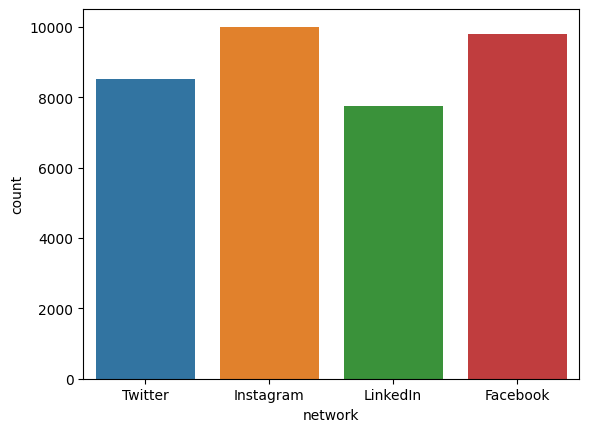

In [ ]:
sns.countplot(x='network', data=media_post)

<Axes: xlabel='content_type', ylabel='count'>

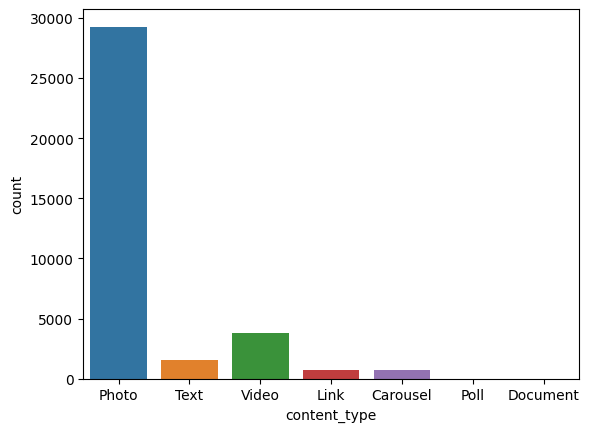

In [ ]:
sns.countplot(x='content_type',  data=media_post)

<Axes: xlabel='network', ylabel='count'>

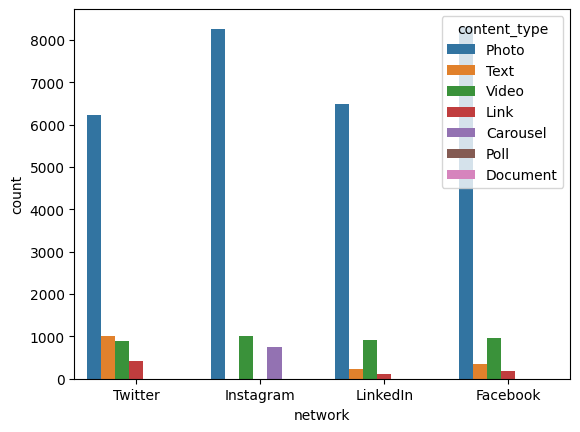

In [ ]:
sns.countplot(x='network',  hue='content_type', data=media_post)

In [ ]:
order_sent_by = media_post['sent_by'].value_counts().index

[Text(0, 0, '11790'),
 Text(0, 0, '8023'),
 Text(0, 0, '7854'),
 Text(0, 0, '4948'),
 Text(0, 0, '2289'),
 Text(0, 0, '1078'),
 Text(0, 0, '104'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

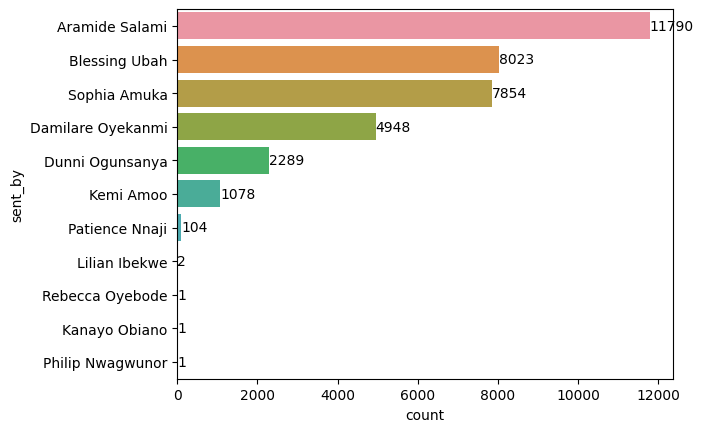

In [ ]:
ax =  sns.countplot(y='sent_by', data=media_post, order=order_sent_by)
ax.bar_label(ax.containers[0])

<Axes: xlabel='year', ylabel='impressions'>

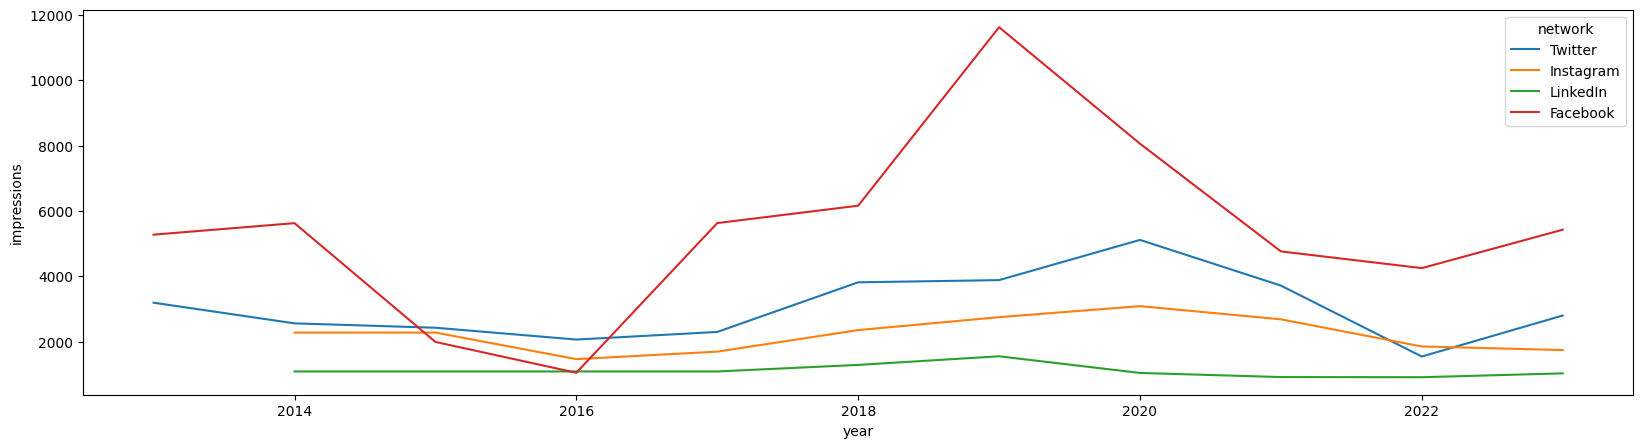

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='year', y='impressions', hue='network', data=media_post,  err_style=None)

In [ ]:
media_post['impressions'].mean()

3207.4833838128734

## Define Key Questions (here are a few examples, not exhaustive):
* What are the most engaging types of posts?
* Which platform yields the highest engagement for the client?
* What are the peak times for user engagement?
* Are there any noticeable trends over time (e.g., increasing likes, decreasing shares)?

<Axes: xlabel='network', ylabel='impressions'>

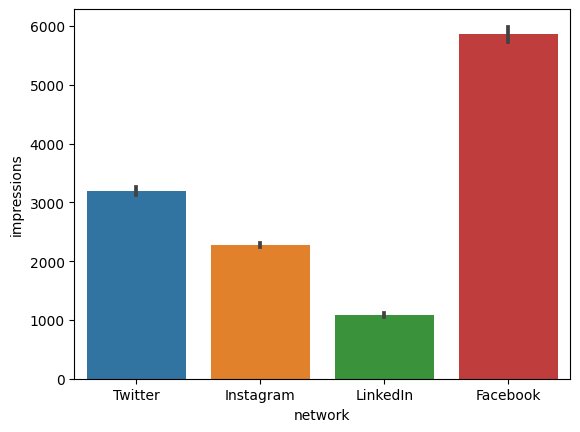

In [ ]:
# 1)
sns.barplot(x='network', y='impressions', data=media_post)

In [ ]:
media_post['content_type'] = media_post['content_type'].map({'Photo':'Photo','Text':'Text','Video':'Video','Carousel':'Photo','Poll':'Text','Document':'Text', 'Link':'Text'})

In [ ]:
media_post['content_type'].value_counts()

array(['Photo', 'Text', 'Video', 'Link', 'Carousel', 'Poll', 'Document'],
      dtype=object)

<Axes: xlabel='network', ylabel='impressions'>

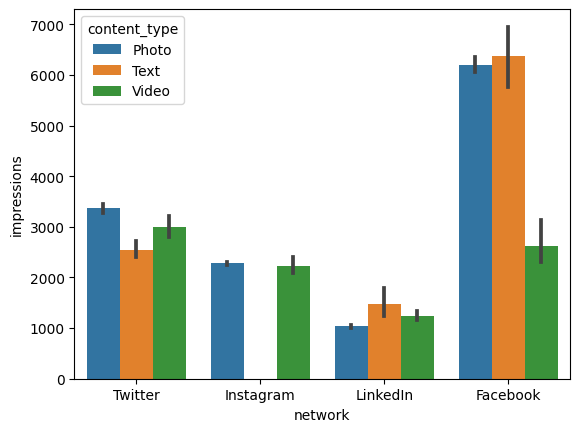

In [ ]:
# 2)
sns.barplot(x='network', y='impressions', hue='content_type', data=media_post)

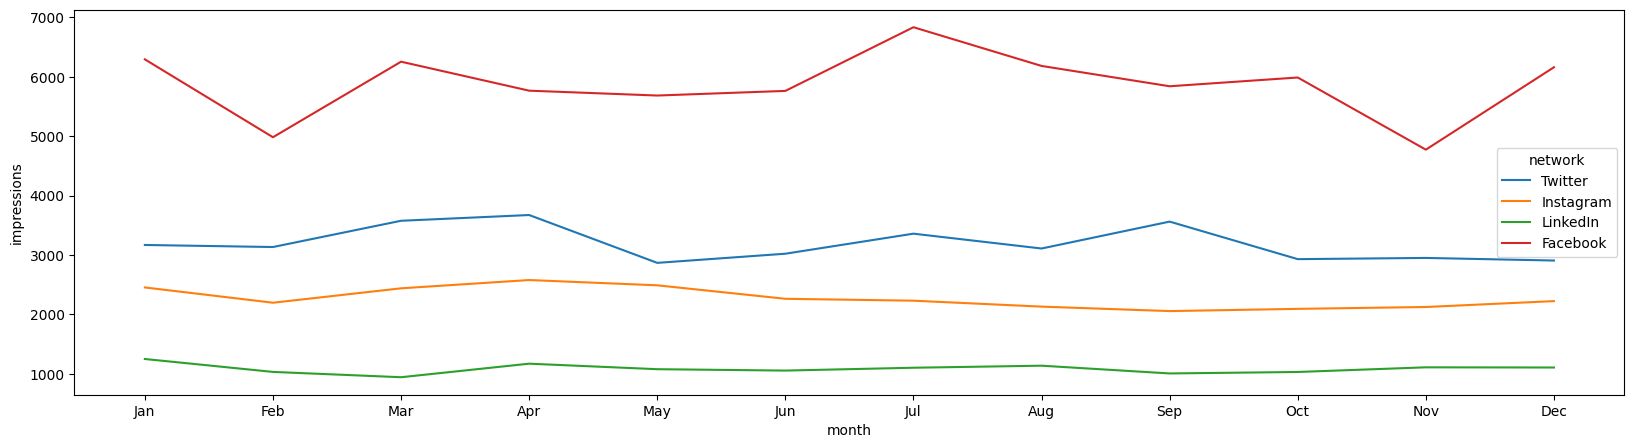

In [ ]:
# 3)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='month', y='impressions', hue='network', data=media_post,  err_style=None)
ax.set_xticks(list(range(1,13)))
_ = ax.set_xticklabels(months)

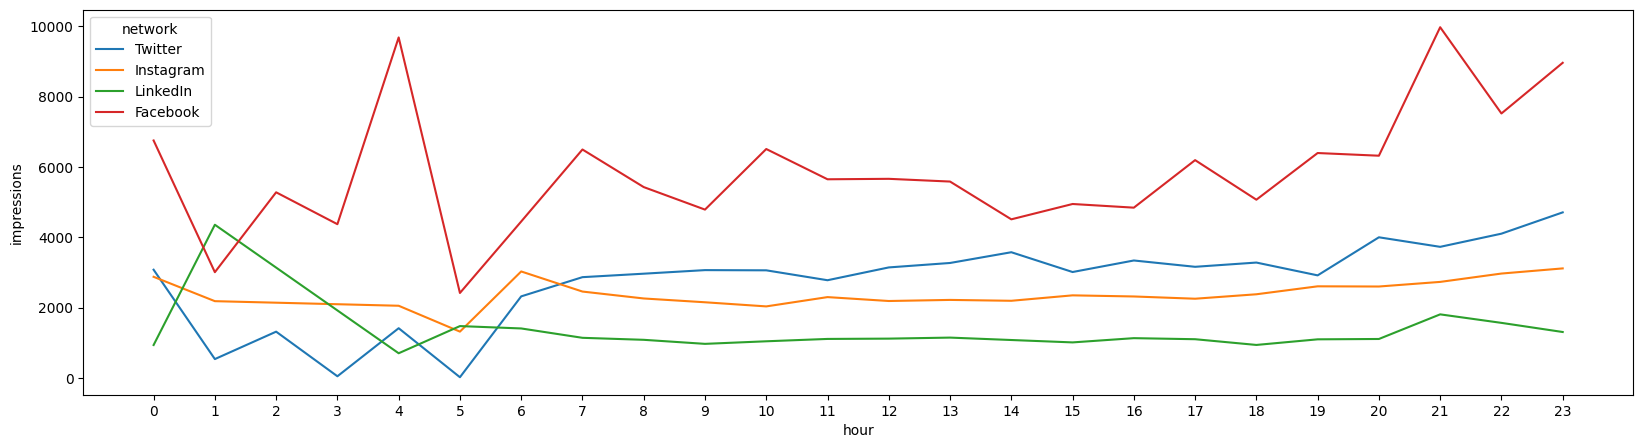

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='hour', y='impressions', hue='network', data=media_post,  err_style=None)
_ = ax.set_xticks(list(range(0,24)))

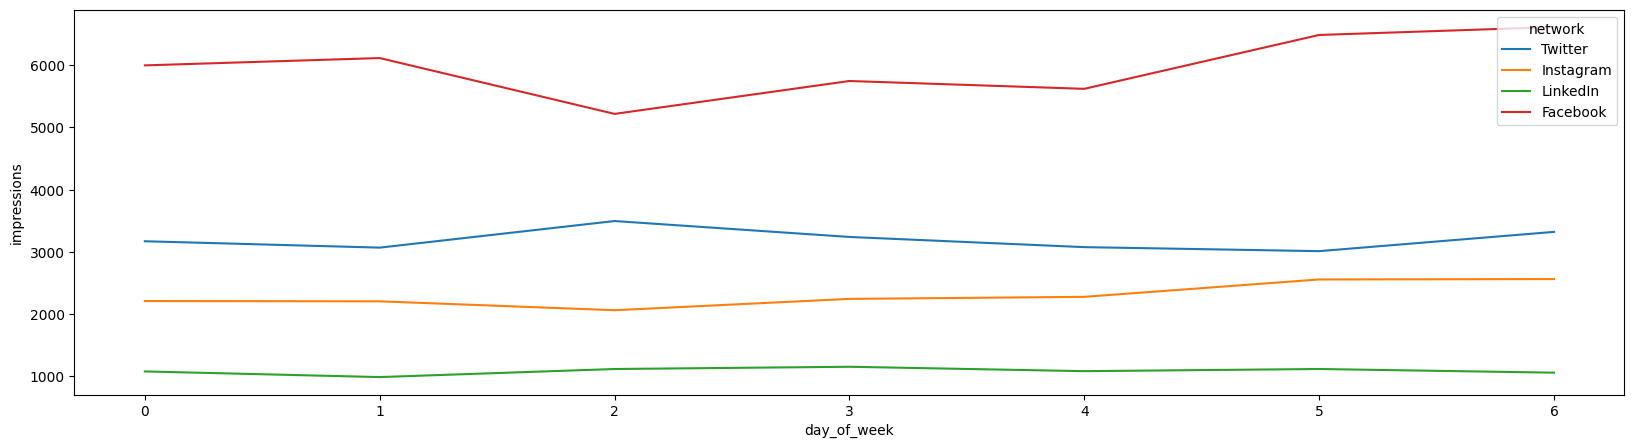

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='day_of_week', y='impressions', hue='network', data=media_post,  err_style=None)
_ = ax.set_xticks(list(range(0,7)))

<Axes: xlabel='network', ylabel='engagements'>

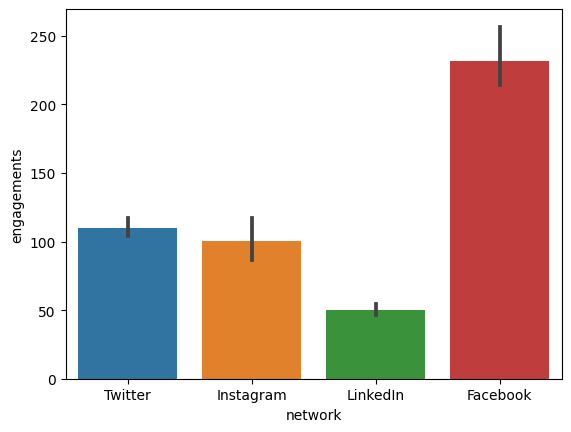

In [ ]:
sns.barplot(x='network', y='engagements', data=media_post)

<Axes: xlabel='network', ylabel='engagements'>

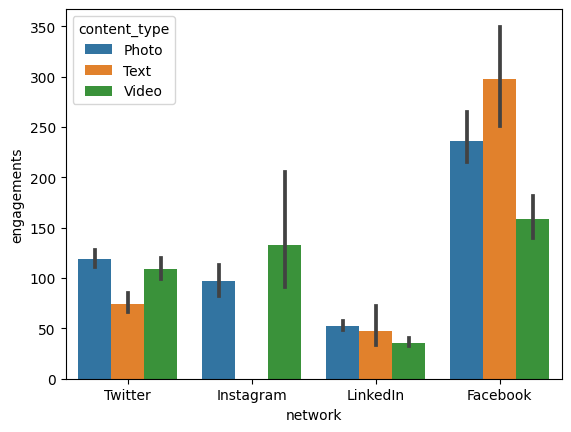

In [ ]:
sns.barplot(x='network', y='engagements', hue='content_type', data=media_post)

<Axes: xlabel='network', ylabel='engagements'>

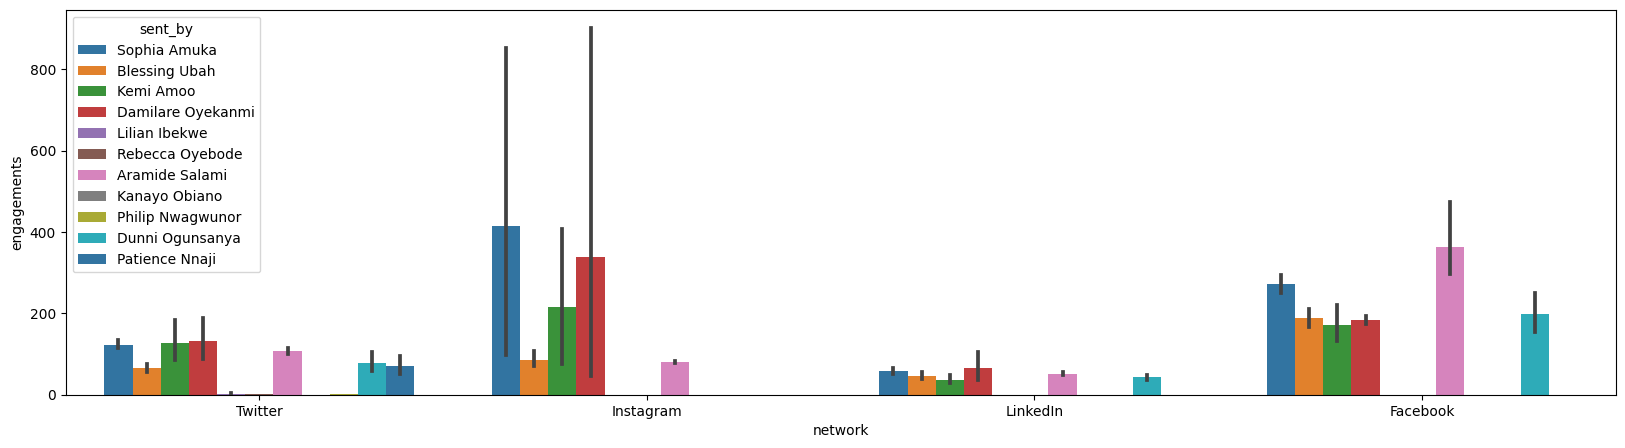

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='network', y='engagements', hue='sent_by', data=media_post, palette='tab10')

<Axes: xlabel='network', ylabel='reactions'>

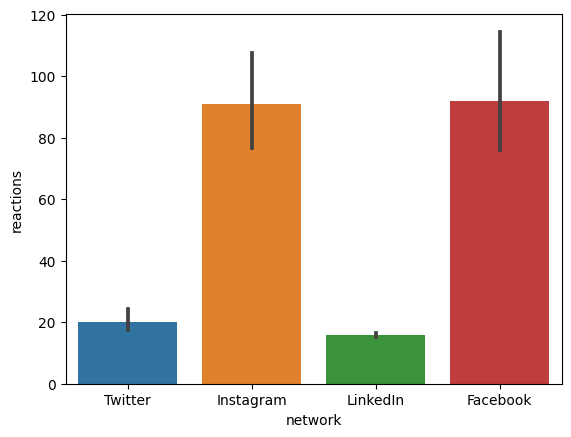

In [ ]:
sns.barplot(x='network', y='reactions', data=media_post)

<Axes: xlabel='network', ylabel='post_clicks_all'>

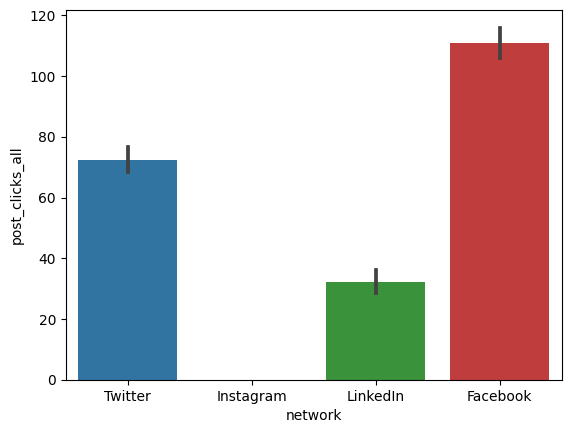

In [ ]:
sns.barplot(x='network', y='post_clicks_all', data=media_post)

<Axes: xlabel='linked_content', ylabel='count'>

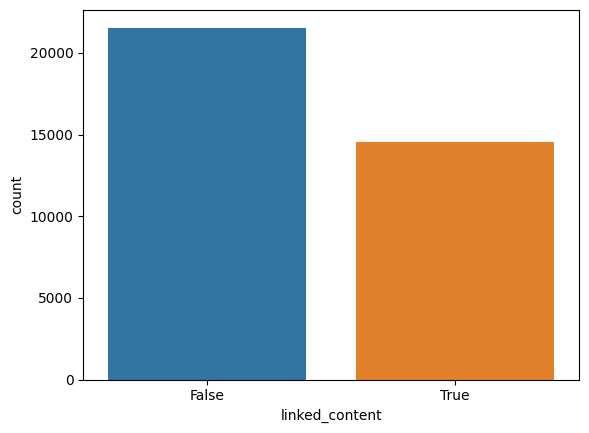

In [134]:
sns.countplot(x='linked_content', data=media_post)

<Axes: xlabel='network', ylabel='impressions'>

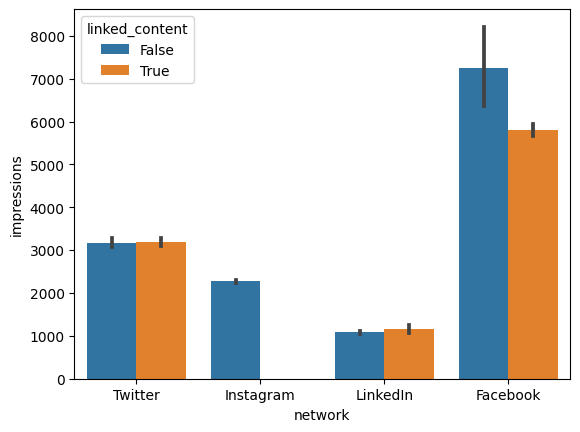

In [137]:
sns.barplot(x='network', y='impressions', hue='linked_content', data=media_post)

<Axes: xlabel='content_type', ylabel='impressions'>

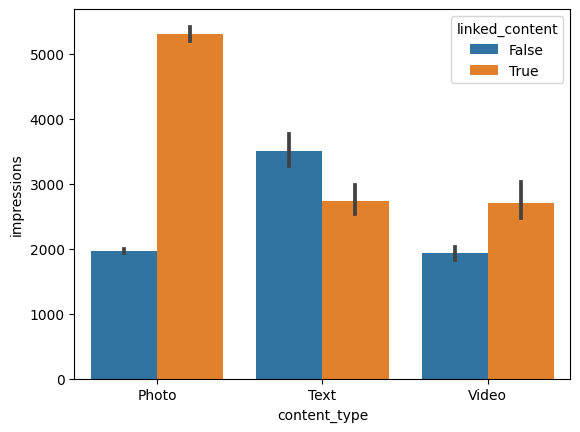

In [138]:
sns.barplot(x='content_type', y='impressions', hue='linked_content', data=media_post)

<Axes: xlabel='network', ylabel='engagements'>

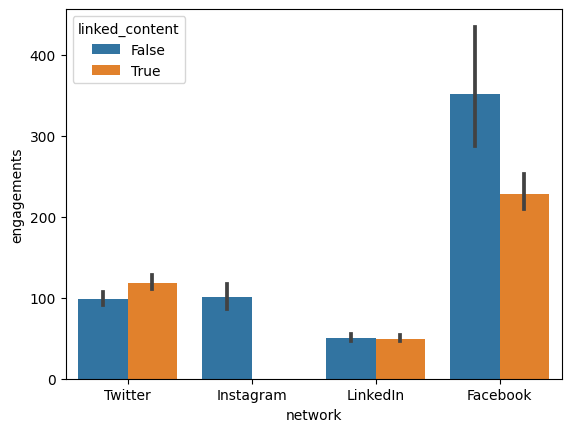

In [140]:
sns.barplot(x='network', y='engagements', hue='linked_content', data=media_post)

<Axes: xlabel='network', ylabel='impressions'>

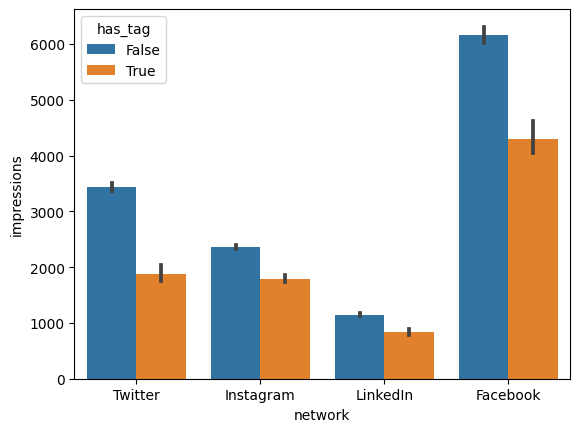

In [139]:
sns.barplot(x='network', y='impressions', hue='has_tag', data=media_post)

<Axes: xlabel='network', ylabel='engagements'>

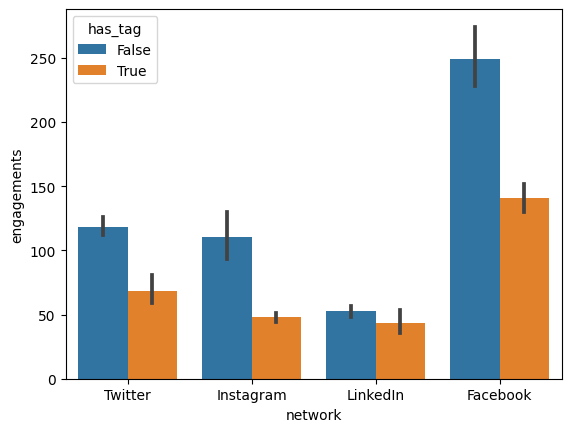

In [142]:
sns.barplot(x='network', y='engagements', hue='has_tag', data=media_post)

## Feature Engineering:
* Based on EDA, create new metrics or indicators that might be more informative. For instance, engagement rate as a ratio of engagements to impressions.

## Deep Dive Analysis:
* Use statistical methods or machine learning (if applicable) to understand underlying patterns or to predict future trends.
* Segment data to find insights specific to certain demographics or post types.

## Insight Generation:
* Based on the analysis, derive actionable insights.
* Translate these insights into recommendations for the client.

## Visualisation:
* Use graphs, charts, and other visualisation tools to make your findings easily digestible.
* Ensure that visualisations are clear and can be understood by someone without a technical background.
* Provide a shareable link to the visualisation

## Report Compilation:
* Organize your findings, insights, and recommendations in a structured report.
* Ensure clarity and simplicity in conveying complex data insights.